In [11]:
import pandas as pd
import matplotlib.pyplot as plt


In [13]:
titanic = pd.read_csv("DATOS/Titanic-Dataset.csv")


a supervivencia dependió tanto de la clase como del sexo: las mujeres y los pasajeros de clases más altas tuvieron mayores tasas de supervivencia

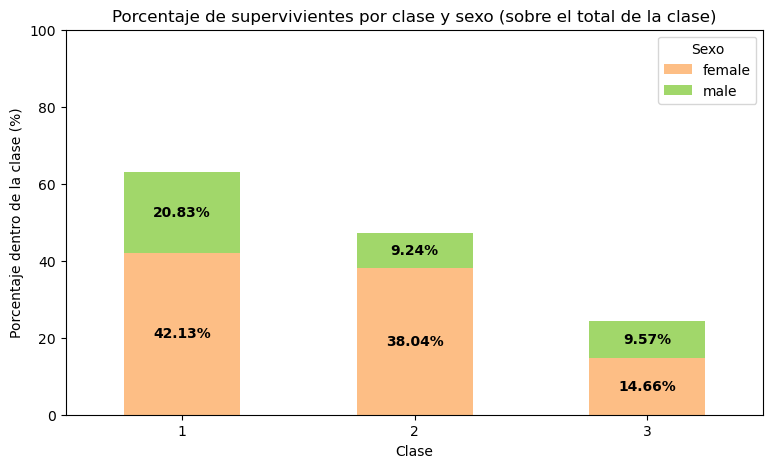

Sex,female,male
Pclass,,
1,42.129630,20.833333
2,38.043478,9.239130
3,14.663951,9.572301


In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Total de personas por clase
total_clase = titanic.groupby('Pclass').size()

# Total de supervivientes por clase y sexo
supervivientes = titanic[titanic['Survived'] == 1].groupby(['Pclass', 'Sex']).size()

# Calcular el porcentaje sobre el total de cada clase
porcentaje = (supervivientes / total_clase * 100).unstack(fill_value=0)

# Colores (mujer, hombre)
colores = ['#FDBE85', '#A1D76A']

# Crear gráfico apilado
ax = porcentaje.plot(kind='bar', stacked=True, color=colores, figsize=(9,5))
# Ajustar etiquetas del eje x (sin rotación)
ax.set_xticklabels(porcentaje.index, rotation=0)

# Etiquetas y formato
plt.title('Porcentaje de supervivientes por clase y sexo (sobre el total de la clase)')
plt.ylabel('Porcentaje dentro de la clase (%)')
plt.xlabel('Clase')
plt.ylim(0, 100)
plt.legend(title='Sexo', loc='upper right')

# Añadir etiquetas con porcentaje dentro de las barras
for i, clase in enumerate(porcentaje.index):
    y_bottom = 0
    for sexo in porcentaje.columns:
        y = porcentaje.loc[clase, sexo]
        if y > 0:
            ax.text(i, y_bottom + y/2, f'{y:.2f}%', ha='center', va='center', fontsize=10, fontweight='bold')
            y_bottom += y

plt.show()

# Mostrar tabla con porcentajes
porcentaje
